In [1]:
import numpy as np
from matplotlib import rcParams
from matplotlib import rc
rcParams['font.family'] = 'Times New Roman'
import matplotlib.pyplot as plt
import pandas as pd
 
path_optical = "../op/optical.dat"
path_hydro = "../op/hydro.dat"
path_LC = "../op/lc.dat"
path_input = "../in_para"
 
df_op = pd.read_csv(path_optical,sep="\s+",header=None)
df_lc = pd.read_csv(path_LC,sep="\s+",header=None)
df_hydro = pd.read_csv(path_hydro,sep="\s+",header=None)
df_in = pd.read_csv(path_input,sep="\s+",header=None)

df_in

,0,1
0,M_ns[Msun],1.400000e+00
1,R_ns[cm],1.200000e+06
2,B_t[G],1.000000e+14
3,B_p[G],1.000000e+14
4,P_0[ms],3.000000e+00
5,E_sn[erg],1.000000e+51
6,M_ej[Msun],5.000000e+00
7,M_Ni[Msun],1.000000e-01
8,M_rpe[Msun],0.000000e+00
9,r_0[cm],1.000000e+11


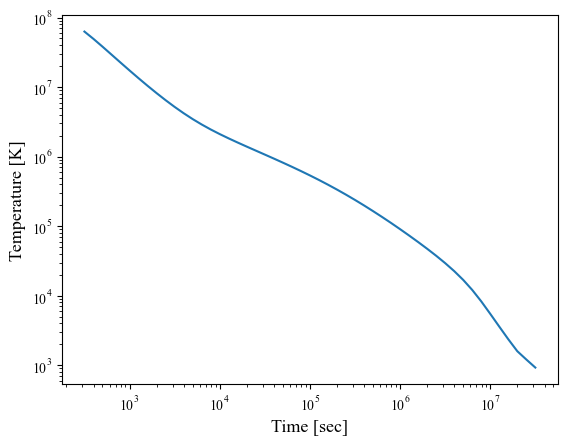

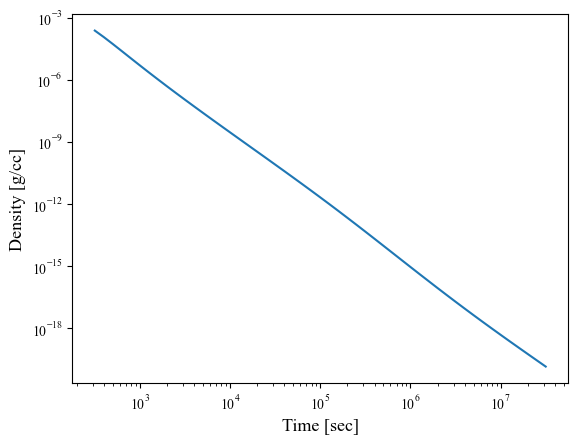

In [2]:
t = df_hydro[0]
rej = df_hydro[2]
vol = 4.*np.pi*rej**3./3
Tej = df_hydro[7]
Mej = 5.e-4*2.e33
rhoej = Mej/vol
 
plt.xlabel("Time [sec]",fontsize = 13)
plt.ylabel("Temperature [K]",fontsize = 13)
plt.loglog(t,Tej)
plt.show()
 
plt.xlabel("Time [sec]",fontsize = 13)
plt.ylabel("Density [g/cc]",fontsize = 13)
plt.loglog(t,rhoej)
plt.show()


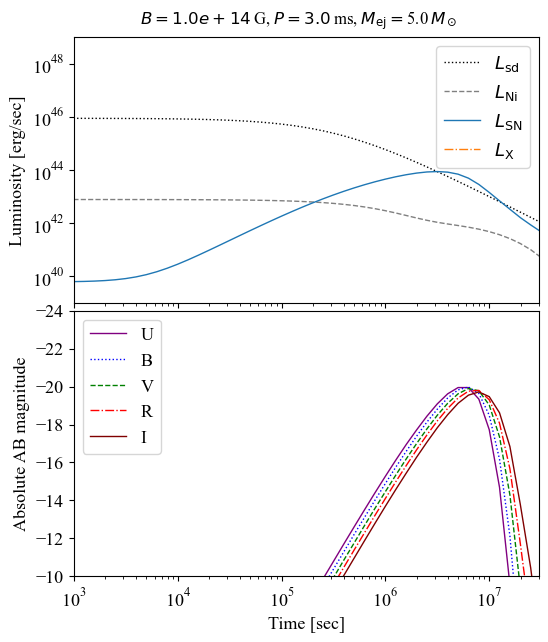

In [3]:
title = '$B = {:.1e}\\,$'.format(df_in[1][3]) + "G, $P = {0}\\,$".format(df_in[1][4]) + "ms, $M_\\mathrm{ej} = $" + "{0}".format(df_in[1][6]) + "$\\,M_\\odot$"
op_file_header = str('B{:.1e}'.format(df_in[1][3])+'P{0}'.format(df_in[1][4]) + 'M{0}'.format(df_in[1][6])).replace(".0", "")
op_file = op_file_header + '.pdf'

rc('xtick', labelsize=13)
rc('ytick', labelsize=13)

fig, (ax2, ax1) = plt.subplots(2, 1,figsize=(6,7))
fig.suptitle(title,y=0.92,font = 'Times New Roman')
plt.subplots_adjust(hspace=0.03)
 
ax1.set_xlim(1.0e3,3e7)
ax1.set_ylim(-10,-24)
ax1.set_xlabel("Time [sec]",fontsize = 13)
ax1.set_ylabel("Absolute AB magnitude",fontsize = 13)
ax1.semilogx(df_op[0],df_op[1], label="U",linestyle = "solid", c = 'purple',linewidth=1)
ax1.semilogx(df_op[0],df_op[2], label="B",linestyle = "dotted", c = "blue",linewidth=1)
ax1.semilogx(df_op[0],df_op[3], label="V",linestyle = "dashed", c= "green",linewidth=1)
ax1.semilogx(df_op[0],df_op[4], label="R", linestyle = "dashdot",c = "red",linewidth=1)
ax1.semilogx(df_op[0],df_op[5], label="I", linestyle = "solid",c = "maroon",linewidth=1)
ax1.legend(fontsize = 13)
 
ax2.set_xlim(1.0e3,3e7)
ax2.set_ylim(1.0e39,1.0e49)
ax2.set_ylabel("Luminosity [erg/sec]",fontsize = 13)
ax2.tick_params('x', labelbottom=False)
ax2.loglog(df_lc[0],df_lc[3], label = "$L_\\mathrm{sd}$", linestyle = "dotted", c = "black",linewidth=1)
ax2.loglog(df_lc[0],df_lc[5], label = "$L_\\mathrm{Ni}$", linestyle = "--", c = "gray",linewidth=1)
ax2.loglog(df_lc[0],df_lc[1], label = "$L_\\mathrm{SN}$", linestyle = "solid",linewidth=1)
ax2.loglog(df_lc[0],df_lc[7], label = "$L_\\mathrm{X}$", linestyle = "dashdot",linewidth=1)
ax2.legend(fontsize = 13)
plt.savefig(op_file)
plt.show()
